# Null hypothesis (Ho) and Alternative hypothesis (Ha), Student test, Jarque-Bera test, Shapiro test, Test for equality of variances, Analysis of variance test (One way ANOVA), Chi2 test, Pearson correlation test, Nonparametric test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

# 1- Student test

In [2]:
# Load data

df = pd.read_csv(r"teachingratings.csv")
df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


# Does gender affect teaching evaluation rates?

Text(0, 0.5, 'Rate')

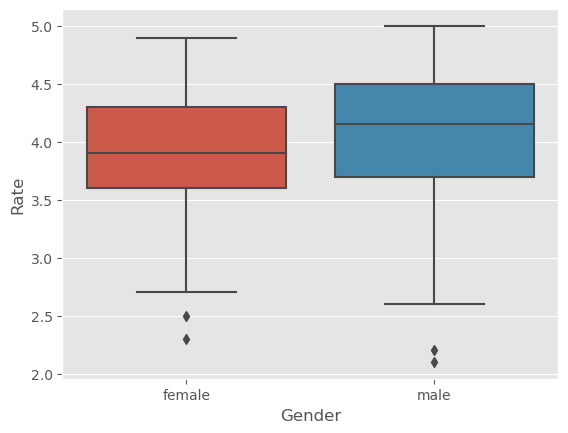

In [3]:
# Visualization of the rating according to gender

sns.boxplot(x = 'gender', y = 'eval', data = df);
plt.xlabel('Gender')
plt.ylabel('Rate')

# Jarque-Bera normality test

In [4]:
stats.jarque_bera(df['eval'])

SignificanceResult(statistic=17.01854902095351, pvalue=0.00020159002332299403)

# Shapiro Wilk normality test

In [5]:
stats.shapiro(df['eval'])

ShapiroResult(statistic=0.9775171875953674, pvalue=1.4274760360422079e-06)

# Test for equality of variances

In [6]:
stats.levene(df[df['gender'] == 'female']['eval'], df[df['gender'] == 'male']['eval'], center = 'mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

# Student test

In [7]:
stats.ttest_ind(df[df['gender'] == 'female']['eval'], df[df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

# 2- Analysis of variance test (One way ANOVA)

# Do instructors' beauty scores differ by age?

In [8]:
df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [9]:
# Creation of age categories

df.loc[(df['age'] <= 40), "age_group"] = "40 years and youngers"

df.loc[(df['age'] > 40) & (df['age'] < 60), "age_group"] = "between 40 and 60 years"

df.loc[(df['age'] >= 60), "age_group"] = "60 years and olders"

df["age_group"]

0        40 years and youngers
1        40 years and youngers
2        40 years and youngers
3        40 years and youngers
4      between 40 and 60 years
                ...           
458      40 years and youngers
459    between 40 and 60 years
460    between 40 and 60 years
461      40 years and youngers
462    between 40 and 60 years
Name: age_group, Length: 463, dtype: object

In [10]:
stats.levene(df[df['age_group'] == "40 years and youngers"]['beauty'], 
             df[df['age_group'] == "between 40 and 60 years"]['beauty'],
            df[df['age_group'] == "60 years and olders"]['beauty'], center = 'mean')

LeveneResult(statistic=11.769735544673434, pvalue=1.0350399938234537e-05)

# ANOVA

In [11]:
stats.f_oneway(df[df['age_group'] == "40 years and youngers"]['beauty'], 
             df[df['age_group'] == "between 40 and 60 years"]['beauty'],
            df[df['age_group'] == "60 years and olders"]['beauty'])

F_onewayResult(statistic=23.552552376353074, pvalue=1.8271127151948056e-10)

# 3- Chi2 test

# Is there a relationship between tenure and gender?

In [12]:
stats.chi2_contingency(pd.crosstab(df['tenure'], df['gender']), correction = True)

Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

# 4- Pearson correlation test, parametric test

# Is the teaching evaluation score correlated with the beauty score?

In [13]:
stats.pearsonr(df['beauty'], df['eval'])

PearsonRResult(statistic=0.18903909084045212, pvalue=4.2471154198134764e-05)

# 5- Nonparametric test

In [14]:
# Load the data

df = pd.read_table(r"fertility_study.txt", delimiter = ',')
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,IndonÃ©sie,ASI,88.8,2.132,"227,345,082"
4,BrÃ©sil,LAT,90.2,1.827,"191,971,506"


In [15]:
# Correlation between the variables “female literacy” and “fertility”
stats.pearsonr(df['female literacy'], df['fertility'])

PearsonRResult(statistic=-0.8041324026815344, pvalue=5.635092985976876e-38)

# Calcul of p-value

In [16]:
# Transformation of variables into Numpy array
literacy = np.array(df['female literacy'])
fertility = np.array(df['fertility'])

N = 1000 # number of simulations

stock = np.empty(N)

for i in range(N):
    # Permutation of literacy or fertility values (one or the other)
    res = np.random.permutation(literacy)
    
    # Calculation of the permutation replica (Pearson coefficient)
    stock[i] = stats.pearsonr(res, fertility)[0]

p = np.sum(stock >= - stats.pearsonr(df['female literacy'], df['fertility'])[0]) #because the coefficient was negative

print('p-value = ', p)

p-value =  0


# 